In [1]:
!git clone https://github.com/albertakn/text_2_image.git
!pip install -r text_2_image/requirements.txt

Cloning into 'text_2_image'...
remote: Enumerating objects: 111, done.
remote: Counting objects: 100% (111/111), done.
remote: Compressing objects: 100% (99/99), done.
remote: Total 111 (delta 32), reused 68 (delta 7), pack-reused 0
Receiving objects: 100% (111/111), 587.07 KiB | 6.38 MiB/s, done.
Resolving deltas: 100% (32/32), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.6/774.6 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 41.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 72.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 38.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 105.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 42.7 MB/s eta 0:00:00
     ━━━━━━━━━

In [2]:
from google.colab import drive

#Чтобы модель заработала, необходимо скачать веса отсюда:
#https://huggingface.co/runwayml/stable-diffusion-v1-5/resolve/main/v1-5-pruned-emaonly.ckpt
#Я сделал это заранее, поэтому просто подгружаю их из своего google drive
drive.mount('/content/drive')
!cp drive/MyDrive/diploma/v1-5-pruned-emaonly.ckpt text_2_image/data/v1-5-pruned-emaonly.ckpt

Mounted at /content/drive


100%|██████████| 50/50 [00:28<00:00,  1.74it/s]


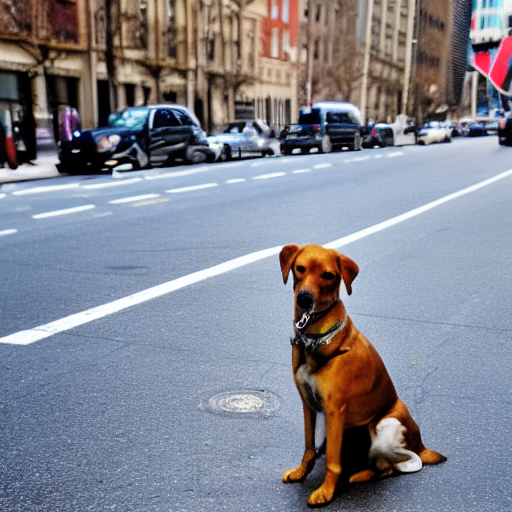

In [3]:
from transformers import CLIPTokenizer
from PIL import Image
from text_2_image.stable_diffusion.util.model_loader import load_models_from_standard_weights
from text_2_image.stable_diffusion.pipeline.pipeline import generate

device = 'cuda'
tokenizer = CLIPTokenizer("text_2_image/data/vocab.json", merges_file="text_2_image/data/merges.txt")
models = load_models_from_standard_weights('text_2_image/data/v1-5-pruned-emaonly.ckpt', 'cuda')

prompt = "A dog in the city"
uncond_prompt = ""
do_cfg = True
cfg_scale = 8 # min: 1, max: 14

# Only ddpm exists
sampler = "ddpm"
num_inference_steps = 50
seed = 42

output_image = generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    # input_image=input_image,
    # strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device="cuda",
    idle_device="cuda",
    tokenizer=tokenizer,
)

Image.fromarray(output_image)